In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Root finding ##

The problem of finding the roots of a 1-dimensional function has a vast literature, and there are many root-finding algorithms out there.  You don't want to try to remember them all, so what's a pragmatic approach?

I've found that I can usually get by with only knowing (or knowing how to look up!) four root finding methods: [bisection](https://en.wikipedia.org/wiki/Bisection_method), [false position](https://en.wikipedia.org/wiki/Regula_falsi), [Ridder](https://en.wikipedia.org/wiki/Ridders%27_method) and [Newton-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method).


In my experience root-finding computations spend a lot of time bracketing the root or getting close, so super-high degree of convergence isn't so useful.  If you can get very close, use Newton, if you want to be sure use a bracketing method (like the other three).  Often you can get close for special functions because there is a good theory of asymptotics, or you have some particular physical insight.  Sometimes you can afford to try Newton first and then back off to something else if that goes haywire.  However sometimes you need some kind of bracketing and convergence guarantee.

Of the bracketing methods, bisection is slowest method by far.  It always works and it is trivial to code so that makes it worth keeping in your toolkit but it's really only using 1 bit of information per function evaluation (the sign bit).

Often going to false position is worth it, and in general I've found that if I can use false position then it's pretty easy to use Ridder and that tends to work a bit better.  Not always tons better, but enough that it's usually worth trying.

In [2]:
def func(x):
    """A sample function"""
    return( x**2 - 9*x + np.sin(x) + 1 )

Text(0, 0.5, '$f(x)$')

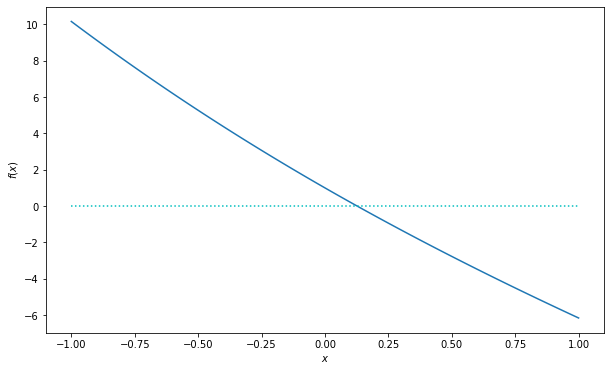

In [3]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
xx = np.linspace(-1.0,1.0,100)
ax.plot(xx,func(xx))
ax.plot(xx,np.zeros_like(xx),'c:')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')

In [4]:
def ridder(x0,x1,eps=0.005,epsf=1e-5):
    """Example of Ridders iteration."""
    f0,f1 = func(x0),func(x1)
    print("x0={:10.3e}, x1={:10.3e}, f0={:10.3e}, f1={:10.3e}".format(x0,x1,f0,f1))
    if f0*f1>=0:
        raise RuntimeError("Root not bracketed initially!")
    f3 = 1
    while (np.abs(x1-x0)>eps)&(np.abs(f3)>epsf):
        x2 = 0.5*(x0+x1)
        f2 = func(x2)
        print("\t x2={:10.3e},f2={:10.3e}".format(x2,f2))
        x3 = x2+(x2-x0)*np.sign(f0-f1)*f2/np.sqrt(f2**2-f0*f1)
        f3 = func(x3)
        print("\t x3={:10.3e},f3={:10.3e}".format(x3,f3))
        if f3*f2<0:	# Root between x2 & x3 (standard case).
            print("\t f3*f2<0")
            x0,x1,f0,f1 = x2,x3,f2,f3
        elif f3*f0<0:	# Root between x0 and x3.
            print("\t f3*f0<0")
            x0,x1,f0,f1 = x0,x3,f0,f3
        elif f3*f1<0:	# Root between x1 and x3.
            print("\t f3*f1<0")
            x0,x1,f0,f1 = x3,x1,f3,f1
        else:
            raise RuntimeError("Unable to bracket root!!!")
        print("x0={:10.3e}, x1={:10.3e}, f0={:10.3e}, f1={:10.3e}".\
              format(x0,x1,f0,f1))
    #

In [5]:
ridder(-1.0,4.0)

x0=-1.000e+00, x1= 4.000e+00, f0= 1.016e+01, f1=-1.976e+01
	 x2= 1.500e+00,f2=-9.253e+00
	 x3= 1.330e-01,f3=-4.638e-02
	 f3*f0<0
x0=-1.000e+00, x1= 1.330e-01, f0= 1.016e+01, f1=-4.638e-02
	 x2=-4.335e-01,f2= 4.670e+00
	 x3= 1.269e-01,f3= 2.874e-04
	 f3*f1<0
x0= 1.269e-01, x1= 1.330e-01, f0= 2.874e-04, f1=-4.638e-02
	 x2= 1.299e-01,f2=-2.305e-02
	 x3= 1.270e-01,f3=-7.182e-11
	 f3*f0<0
x0= 1.269e-01, x1= 1.270e-01, f0= 2.874e-04, f1=-7.182e-11


Upon return we have $(x_0,x_1)$ bracketing the root.  From the function values the algorithm also knows that $x_1$ is a much better approximation than $x_0$ so it may also be able to give this information if you just want a single value back (the typical case!).

### A problem ... ###

One problem with Ridder is that it can sometimes get hung up ...

Let us try Ridder's method on $f(x)=x^2-4$, looking for the root $x=2$ and starting with $1$ and $4$.  Here we will see quite poor performance ...

In [6]:
def func(x):
    """A sample function"""
    return( x**2 - 4 )

In [7]:
ridder(1.,4.,eps=1e-3,epsf=1e-10)

x0= 1.000e+00, x1= 4.000e+00, f0=-3.000e+00, f1= 1.200e+01
	 x2= 2.500e+00,f2= 2.250e+00
	 x3= 1.973e+00,f3=-1.060e-01
	 f3*f2<0
x0= 2.500e+00, x1= 1.973e+00, f0= 2.250e+00, f1=-1.060e-01
	 x2= 2.237e+00,f2= 1.003e+00
	 x3= 2.000e+00,f3=-3.520e-04
	 f3*f2<0
x0= 2.237e+00, x1= 2.000e+00, f0= 1.003e+00, f1=-3.520e-04
	 x2= 2.118e+00,f2= 4.871e-01
	 x3= 2.000e+00,f3=-2.905e-07
	 f3*f2<0
x0= 2.118e+00, x1= 2.000e+00, f0= 4.871e-01, f1=-2.905e-07
	 x2= 2.059e+00,f2= 2.401e-01
	 x3= 2.000e+00,f3=-6.168e-11
	 f3*f2<0
x0= 2.059e+00, x1= 2.000e+00, f0= 2.401e-01, f1=-6.168e-11


Note how $x_3$ is quite a good guess, $f_3$ is actually very small, but in order to keep the root bracketed we take the $f_3f_2<0$ branch which forces us to make $(x_0,x_1)=(x_2,x_3)$.  Since $x_3\approx 2$ this means we very slowly march $x_2$ (and hence $x_0$) upwards.  This leads to the slow convergence.

Now whether this is a problem depends upon how the algorithm is being used.  In the "usual" case we just want a guess for the root.  In this case the algorithm would definitely return $x_1$ and we would be happy.  But if we wanted the bracketing interval it's actually still super poor after all of this work:  root $\in(2.00,2.06)$.

### Hybrid method ###

What if we interlace a bisection or false position step with Ridders steps?  This may help break out of these situations where Ridders is getting stuck (needing to keep the midpoint where we know $f$ is positive).

In [8]:
def hybrid_ridder(x0,x1,eps=0.005,epsf=1e-5):
    """Example of a hybrid Ridders-bisection iteration."""
    f0,f1 = func(x0),func(x1)
    print("x0={:10.3e}, x1={:10.3e}, f0={:10.3e}, f1={:10.3e}".format(x0,x1,f0,f1))
    if f0*f1>=0:
        raise RuntimeError("Root not bracketed initially!")
    f3 = 1
    while (np.abs(x1-x0)>eps)&(np.abs(f3)>epsf):
        x2 = 0.5*(x0+x1)
        f2 = func(x2)
        print("\t x2={:10.3e},f2={:10.3e}".format(x2,f2))
        x3 = x2+(x2-x0)*np.sign(f0-f1)*f2/np.sqrt(f2**2-f0*f1)
        f3 = func(x3)
        print("\t x3={:10.3e},f3={:10.3e}".format(x3,f3))
        if f3*f2<0:	# Root between x2 & x3 (standard case).
            print("\t f3*f2<0")
            x0,x1,f0,f1 = x2,x3,f2,f3
        elif f3*f0<0:	# Root between x0 and x3.
            print("\t f3*f0<0")
            x0,x1,f0,f1 = x0,x3,f0,f3
        elif f3*f1<0:	# Root between x1 and x3.
            print("\t f3*f1<0")
            x0,x1,f0,f1 = x3,x1,f3,f1
        else:
            raise RuntimeError("Unable to bracket root!!!")
        print("x0={:10.3e}, x1={:10.3e}, f0={:10.3e}, f1={:10.3e}".\
              format(x0,x1,f0,f1))
        # Now we add a bisection step ... note in this case I'm doing
        # one Ridder and one bisection.  This is likely not at all the
        # best balance.
        x2 = 0.5*(x0+x1)
        f2 = func(x2)
        print("\t x2={:10.3e},f2={:10.3e}".format(x2,f2))
        if f2*f0<0:
            print("\t f2*f0<0")
            x0,x1,f0,f1 = x0,x2,f0,f2
        else:
            print("\t f2*f1<0")
            x0,x1,f0,f1 = x2,x1,f2,f1
        print("x0={:10.3e}, x1={:10.3e}, f0={:10.3e}, f1={:10.3e}".\
              format(x0,x1,f0,f1))
    #

In [9]:
hybrid_ridder(1.,4.,eps=1e-3,epsf=1e-8)

x0= 1.000e+00, x1= 4.000e+00, f0=-3.000e+00, f1= 1.200e+01
	 x2= 2.500e+00,f2= 2.250e+00
	 x3= 1.973e+00,f3=-1.060e-01
	 f3*f2<0
x0= 2.500e+00, x1= 1.973e+00, f0= 2.250e+00, f1=-1.060e-01
	 x2= 2.237e+00,f2= 1.003e+00
	 f2*f1<0
x0= 2.237e+00, x1= 1.973e+00, f0= 1.003e+00, f1=-1.060e-01
	 x2= 2.105e+00,f2= 4.310e-01
	 x3= 2.000e+00,f3=-7.871e-05
	 f3*f2<0
x0= 2.105e+00, x1= 2.000e+00, f0= 4.310e-01, f1=-7.871e-05
	 x2= 2.052e+00,f2= 2.127e-01
	 f2*f1<0
x0= 2.052e+00, x1= 2.000e+00, f0= 2.127e-01, f1=-7.871e-05
	 x2= 2.026e+00,f2= 1.056e-01
	 x3= 2.000e+00,f3=-3.342e-09
	 f3*f2<0
x0= 2.026e+00, x1= 2.000e+00, f0= 1.056e-01, f1=-3.342e-09
	 x2= 2.013e+00,f2= 5.264e-02
	 f2*f1<0
x0= 2.013e+00, x1= 2.000e+00, f0= 5.264e-02, f1=-3.342e-09


Sticking with our "poor" example for Ridder, let's see how many function evaluations we would need to get to $|f(x)|<10^{-10}$.

In [10]:
func_counter = 0
#
def func(x):
    """A sample function"""
    global func_counter
    func_counter += 1
    return( x**2 - 4 )

In [11]:
func_counter = 0
ridder(1.,4.,eps=1e-3,epsf=1e-10)
print("Took ",func_counter," function evaluations.")

x0= 1.000e+00, x1= 4.000e+00, f0=-3.000e+00, f1= 1.200e+01
	 x2= 2.500e+00,f2= 2.250e+00
	 x3= 1.973e+00,f3=-1.060e-01
	 f3*f2<0
x0= 2.500e+00, x1= 1.973e+00, f0= 2.250e+00, f1=-1.060e-01
	 x2= 2.237e+00,f2= 1.003e+00
	 x3= 2.000e+00,f3=-3.520e-04
	 f3*f2<0
x0= 2.237e+00, x1= 2.000e+00, f0= 1.003e+00, f1=-3.520e-04
	 x2= 2.118e+00,f2= 4.871e-01
	 x3= 2.000e+00,f3=-2.905e-07
	 f3*f2<0
x0= 2.118e+00, x1= 2.000e+00, f0= 4.871e-01, f1=-2.905e-07
	 x2= 2.059e+00,f2= 2.401e-01
	 x3= 2.000e+00,f3=-6.168e-11
	 f3*f2<0
x0= 2.059e+00, x1= 2.000e+00, f0= 2.401e-01, f1=-6.168e-11
Took  10  function evaluations.


In [12]:
func_counter = 0
hybrid_ridder(1.,4.,eps=1e-3,epsf=1e-10)
print("Took ",func_counter," function evaluations.")

x0= 1.000e+00, x1= 4.000e+00, f0=-3.000e+00, f1= 1.200e+01
	 x2= 2.500e+00,f2= 2.250e+00
	 x3= 1.973e+00,f3=-1.060e-01
	 f3*f2<0
x0= 2.500e+00, x1= 1.973e+00, f0= 2.250e+00, f1=-1.060e-01
	 x2= 2.237e+00,f2= 1.003e+00
	 f2*f1<0
x0= 2.237e+00, x1= 1.973e+00, f0= 1.003e+00, f1=-1.060e-01
	 x2= 2.105e+00,f2= 4.310e-01
	 x3= 2.000e+00,f3=-7.871e-05
	 f3*f2<0
x0= 2.105e+00, x1= 2.000e+00, f0= 4.310e-01, f1=-7.871e-05
	 x2= 2.052e+00,f2= 2.127e-01
	 f2*f1<0
x0= 2.052e+00, x1= 2.000e+00, f0= 2.127e-01, f1=-7.871e-05
	 x2= 2.026e+00,f2= 1.056e-01
	 x3= 2.000e+00,f3=-3.342e-09
	 f3*f2<0
x0= 2.026e+00, x1= 2.000e+00, f0= 1.056e-01, f1=-3.342e-09
	 x2= 2.013e+00,f2= 5.264e-02
	 f2*f1<0
x0= 2.013e+00, x1= 2.000e+00, f0= 5.264e-02, f1=-3.342e-09
	 x2= 2.007e+00,f2= 2.627e-02
	 x3= 2.000e+00,f3=-7.105e-15
	 f3*f2<0
x0= 2.007e+00, x1= 2.000e+00, f0= 2.627e-02, f1=-7.105e-15
	 x2= 2.003e+00,f2= 1.313e-02
	 f2*f1<0
x0= 2.003e+00, x1= 2.000e+00, f0= 1.313e-02, f1=-7.105e-15
Took  14  function evaluation